<a href="https://colab.research.google.com/github/MiguelAngel-ht/Notas-Introduccion-a-la-IA/blob/main/04-Arbol-de-Decision/Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Leer datos
import pandas as pd
datos = pd.read_csv("U4_04_train.csv")
datos.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# Preparando datos
datos["Age"] = datos["Age"].fillna(datos["Age"].mean())
datos = datos.drop(["Cabin"], axis=1)
datos = datos.dropna()
datos = datos.drop(["Name", "PassengerId", "Ticket"], axis=1)

datos = datos.join(pd.get_dummies(datos["Sex"], drop_first=True))
datos = datos.drop(["Sex"], axis=1)

datos = datos.join(pd.get_dummies(datos["Embarked"], drop_first=True))
datos = datos.drop(["Embarked"], axis=1)


In [4]:
# Verificando rápido
datos.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Age       889 non-null    float64
 3   SibSp     889 non-null    int64  
 4   Parch     889 non-null    int64  
 5   Fare      889 non-null    float64
 6   male      889 non-null    uint8  
 7   Q         889 non-null    uint8  
 8   S         889 non-null    uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 83.5 KB


In [5]:
# Características y etiquetas
X = datos.drop(["Survived"], axis=1)
y = datos["Survived"]

In [6]:
# Entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_ent, X_pru, y_ent, y_pru = train_test_split(X, y, test_size=.2)

In [14]:
# Modelo por profundidad
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

for i in range(1, 15):
  modelo = DecisionTreeClassifier(max_depth=i)
  modelo.fit(X_ent, y_ent)
  predicciones = modelo.predict(X_pru)
  exactitud = accuracy_score(y_pru, predicciones)
  print(f"Resultado para {i}: {exactitud}")

Resultado para 1: 0.7808988764044944
Resultado para 2: 0.7696629213483146
Resultado para 3: 0.797752808988764
Resultado para 4: 0.8089887640449438
Resultado para 5: 0.8258426966292135
Resultado para 6: 0.797752808988764
Resultado para 7: 0.7921348314606742
Resultado para 8: 0.7865168539325843
Resultado para 9: 0.7752808988764045
Resultado para 10: 0.7865168539325843
Resultado para 11: 0.797752808988764
Resultado para 12: 0.7865168539325843
Resultado para 13: 0.7808988764044944
Resultado para 14: 0.7696629213483146


In [15]:
# Modelo Óptimo
modelo = DecisionTreeClassifier(max_depth=5)
modelo.fit(X_ent, y_ent)
predicciones = modelo.predict(X_pru)
exactitud = accuracy_score(y_pru, predicciones)

In [16]:
# Reporte del modelo
from sklearn.metrics import classification_report
print(classification_report(y_pru, predicciones))

              precision    recall  f1-score   support

           0       0.81      0.89      0.85       103
           1       0.83      0.72      0.77        75

    accuracy                           0.82       178
   macro avg       0.82      0.81      0.81       178
weighted avg       0.82      0.82      0.82       178



In [17]:
# Matriz de confusión
from sklearn.metrics import confusion_matrix
pd.DataFrame(confusion_matrix(y_pru, predicciones), columns=["Pred: No", "Pred: Si"], index=["Real: No", "Real: Si"])

,Pred: No,Pred: Si
Real: No,92,11
Real: Si,21,54


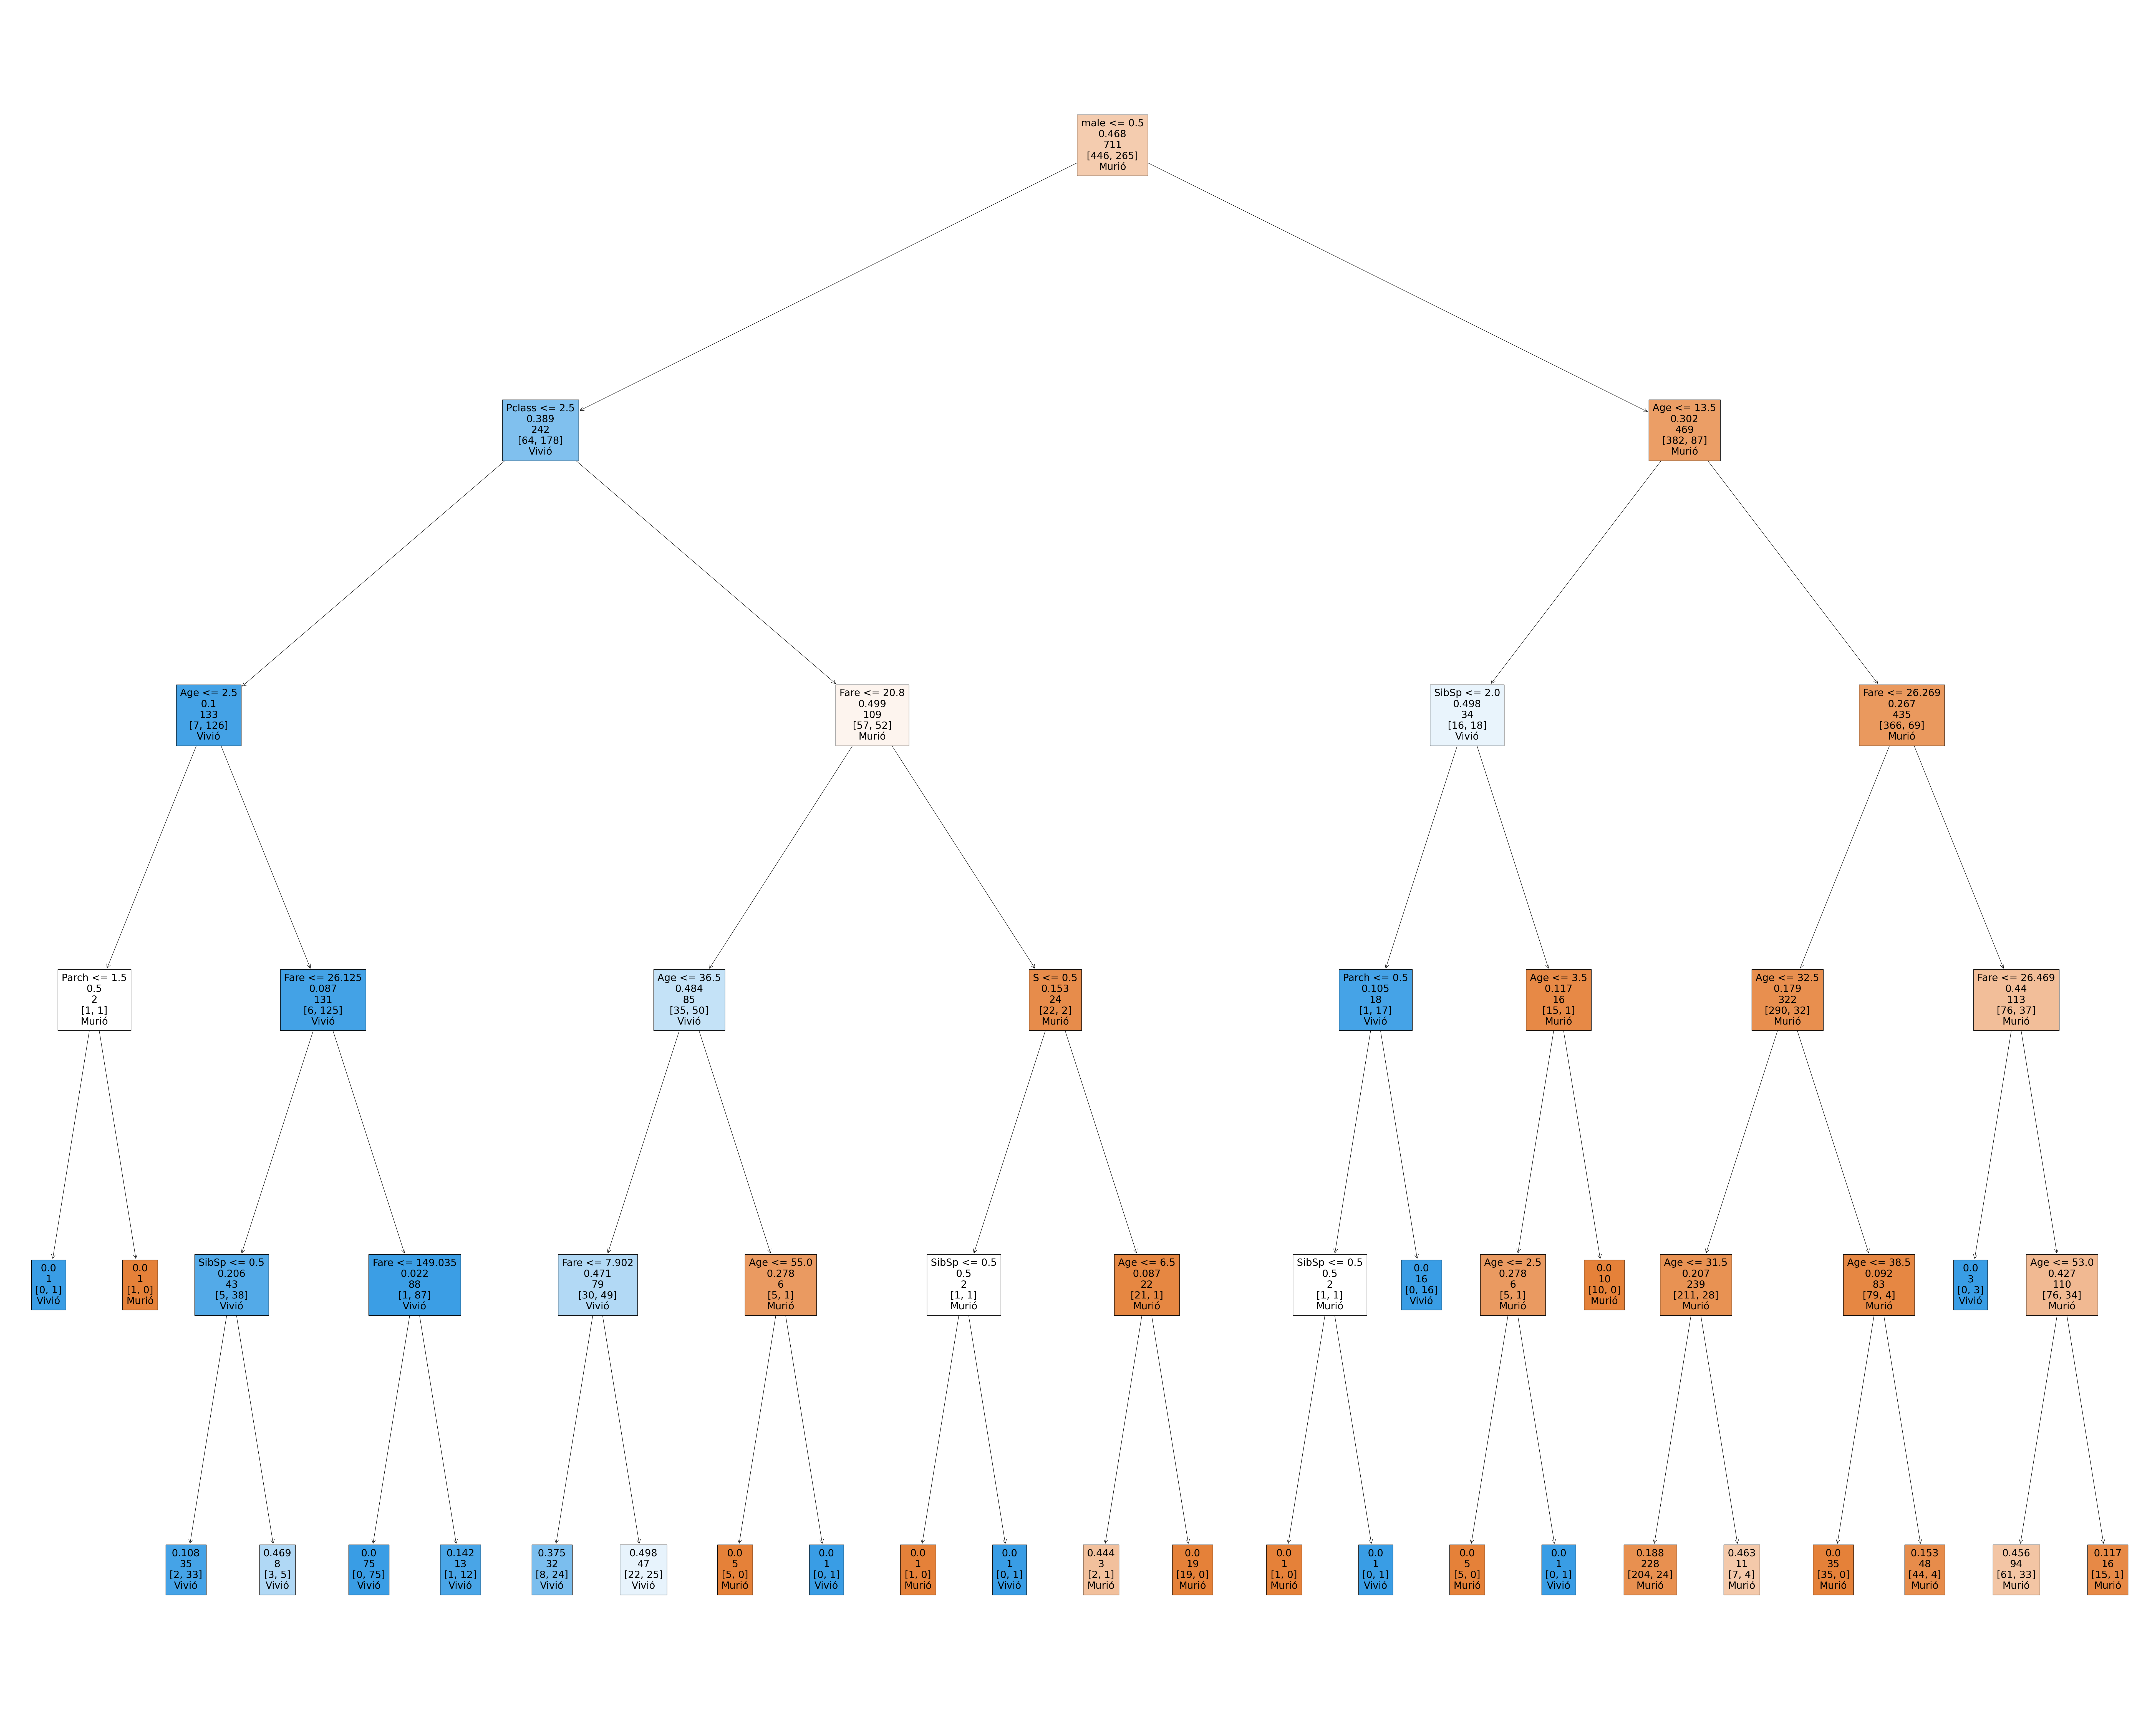

In [19]:
# Mostrar el árbol generado con el modelo
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(100, 80))
plot_tree(
    modelo,
    feature_names=X_ent.columns,
    class_names=["Murió", "Vivió"],
    filled=True, label="none"
)
plt.show()